<a href="https://colab.research.google.com/github/Alex1s-sys/Probabilidad-y-estadistica/blob/main/Unidad1/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probabilidad y estadistica
##Unidad 1
## Facilitador:Jose Gabriel Rodriguez Rivas
##Alumno:Erick Alexis Flores Reyes
## **Programa 6:Estadistica basica e histogramas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from statistics import *

In [ ]:
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1", on_bad_lines='skip')

In [ ]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
#1. Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central
data_column = autos['price']

maximo1 = data_column.max()
minimo1 = data_column.min()
rango1 = maximo1 - minimo1
media1 = data_column.mean()
mediana1 = data_column.median()
# La moda puede tener múltiples valores o ninguno, se usa .mode()[0] para obtener el primer valor si existe.
# Se convierte a lista para manejar múltiples modas si las hay, y se selecciona la primera
moda1 = data_column.mode().tolist()[0] if not data_column.mode().empty else 'N/A'

desviacion_estandar_1 = data_column.std()

print("Estadistica descriptiva autos: \n",
      "Media: ", media1,
      "\n Mediana: ", mediana1,
      "\n Moda: ", moda1,
      "\n Maximo: ", maximo1,
      "\n Minimo: ", minimo1,
      "\n Rango: ", rango1,
      "\n Desviación estándar: ", desviacion_estandar_1)

Estadistica descriptiva autos: 
 Media:  13207.129353233831 
 Mediana:  10295.0 
 Moda:  5572.0 
 Maximo:  45400.0 
 Minimo:  5118.0 
 Rango:  40282.0 
 Desviación estándar:  7947.066341939271


In [ ]:
#Determinar los estadísticos y cuartiles con la función describe()
estadisticos_descriptivos = autos.describe()
display(estadisticos_descriptivos)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#Se determina mediante la regla de sturges la cantidad otima de bins o separadores
import numpy as np

n = len(autos['price'])
num_bins_sturges = int(1 + np.log2(n))
print(f"Según la regla de Sturges, la cantidad óptima de bins es: {num_bins_sturges}")

Según la regla de Sturges, la cantidad óptima de bins es: 8


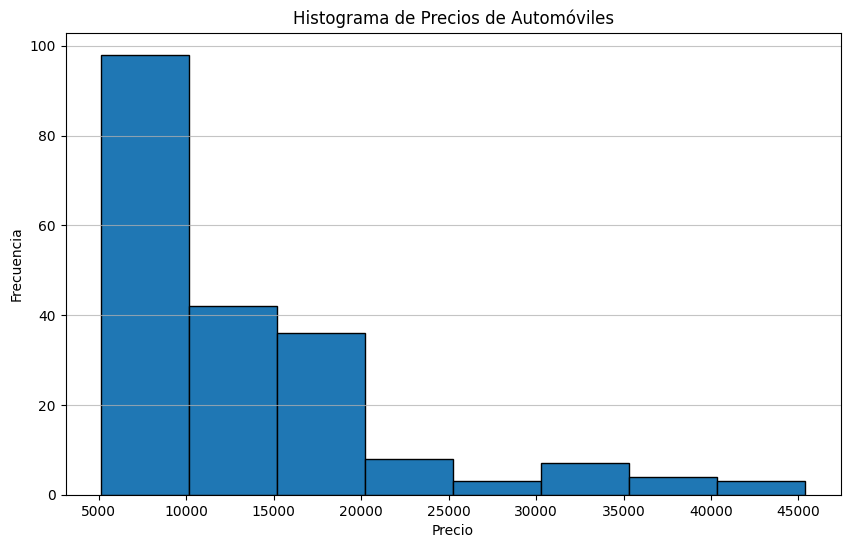

In [ ]:
# 2.Se crea un histograma en base a la fila price utilizando 8 'bins' como se calculó previamente con la regla de Sturges.
plt.figure(figsize=(10, 6))
plt.hist(autos['price'], bins=num_bins_sturges, edgecolor='black')
plt.title('Histograma de Precios de Automóviles')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

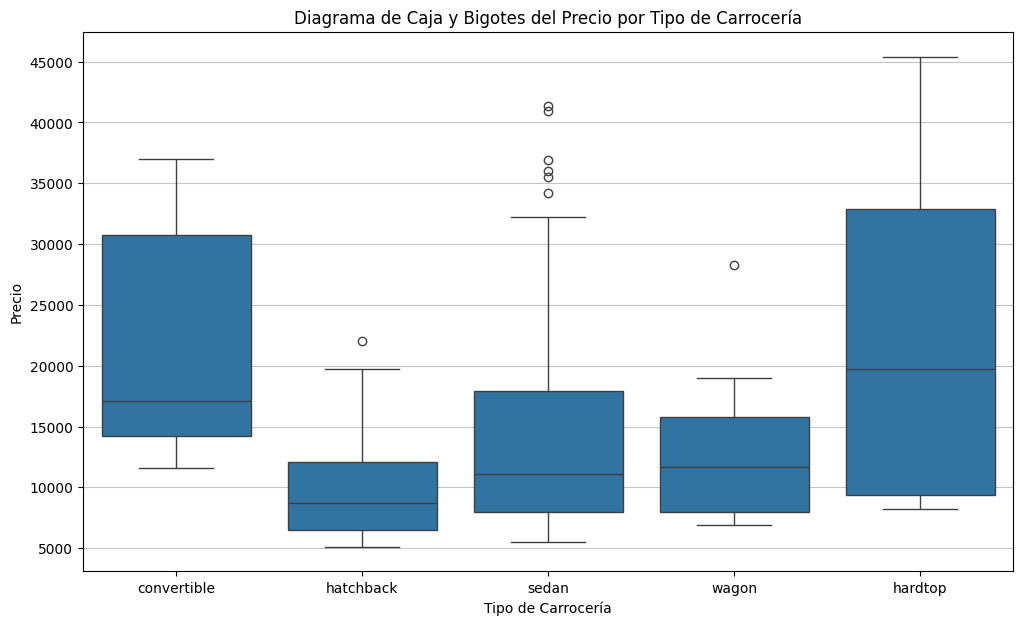

In [ ]:
# 3.visualiza la relación estadística entre el precio del automóvil y el tipo de carrocería (body-style). Permitiendo ver la distribución de precios para cada tipo de vehículo.
plt.figure(figsize=(12, 7))
sns.boxplot(x='body-style', y='price', data=autos)
plt.title('Diagrama de Caja y Bigotes del Precio por Tipo de Carrocería')
plt.xlabel('Tipo de Carrocería')
plt.ylabel('Precio')
plt.grid(axis='y', alpha=0.75)
plt.show()

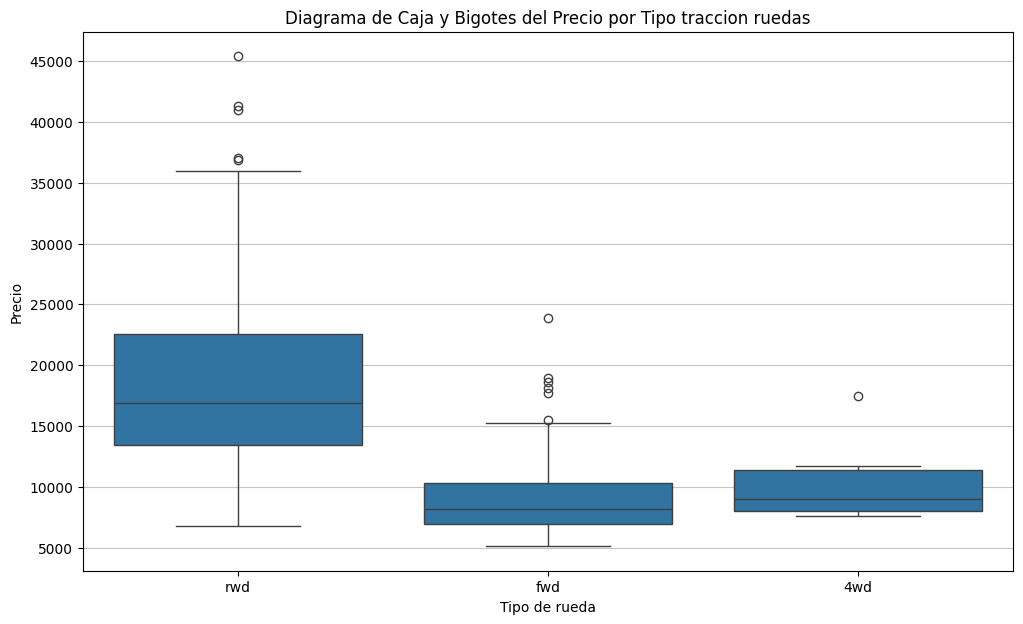

In [ ]:
#4. Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)
plt.figure(figsize=(12, 7))
sns.boxplot(x='drive-wheels', y='price', data=autos)
plt.title('Diagrama de Caja y Bigotes del Precio por Tipo traccion ruedas')
plt.xlabel('Tipo de rueda')
plt.ylabel('Precio')
plt.grid(axis='y', alpha=0.75)
plt.show()

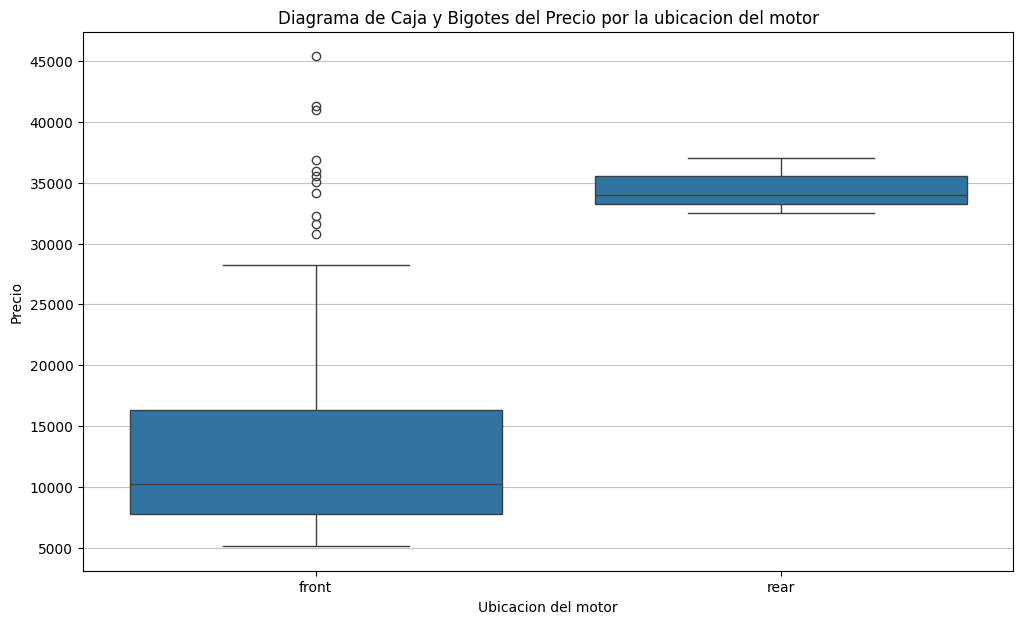

In [ ]:
#5. Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)
plt.figure(figsize=(12, 7))
sns.boxplot(x='engine-location', y='price', data=autos)
plt.title('Diagrama de Caja y Bigotes del Precio por la ubicacion del motor')
plt.xlabel('Ubicacion del motor')
plt.ylabel('Precio')
plt.grid(axis='y', alpha=0.75)